- ELBRUSE Bootcamp 
- 03-12-2024
- Home Work Week 1 Day 2
- Andrey Abramov
- abramov.andre@yandex.ru

# Часть 1 / 3

## Exploratory Data Analysis

разведочного анализа данных по данным международного сервиса по продаже и аренде жилой недвижимости Alyona Ivanovna Real Estate Agency / AI REA Ltd. 

Для проведения анализа получены данные: файл _data.csv.

#  Содержание

0. Загрузка библиотек и вспомогательные функции
1. Загрузка данных
2. Обзор массива
3. Разбиение массива по городам
4. Детальная структура массива
5. Подготовка массива к машинному обучению - план

# 0. Загрузка библиотек и вспомогательные функции

## Загрузка библиотек

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import re
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS 
import matplotlib.pyplot as plt
import seaborn as sns

# Вспомогательные функции

In [50]:
# вспомогательная функция для оценки типов данных в столбце по первой строке
def column_type(test : pd.DataFrame):
    answer = pd.DataFrame([], columns=['Columns', 'Type'])
    for i in test.columns.to_list():
        answer.loc[len(answer)] =  [i, type(test[i][0])]
        answer.reset_index(drop=True)
    return answer

# построение типовых barplot графиков по ходу анализа
def plot_it(df, x_column, y_column, 
            plot_title, x_label, y_label, x_vertical=False):
    plt.style.use('default')

    plt.figure(figsize=(10, 7), dpi=50)
    sns.barplot(x=x_column, y=y_column, data=df)

    plt.title(plot_title, size=22)
    plt.xlabel(x_label, size=18)
    plt.ylabel(y_label, size=18)
    if x_vertical: 
        plt.xticks(rotation = "vertical" )
    plt.xticks(size=15)
    plt.yticks(size=15)

    plt.show()

# поиск категориальных данных по структуре массива
def find_categories(data):
    answer = []   
    a2 = ['', '', '']
    for name in data.columns:       
        a2[0] = name
        if (type(data[name][0]) == str):
            a2[1] = 'строка'
        a2[2] = str(data[name].nunique())
        answer.append(a2.copy())
    return print(pd.DataFrame(answer, columns=['Столбец', 'Тип', 'Уникальных']))


# 1. Загрузка данных

In [51]:
path = '/home/andrey/Documents/Working/W3D4-real/data/_data.csv'
data = pd.read_csv(path, index_col=[0])
data.reset_index()
data.head(3)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


# 2. Обзор массива

## Единичная запись предоставленного массива данных:

In [52]:
data.loc[0, :]

ID  объявления                                                      271271157
Количество комнат                                                           4
Тип                                                                  Квартира
Метро                                            м. Смоленская (9 мин пешком)
Адрес                                           Москва, улица Новый Арбат, 27
Площадь, м2                                                        200.0/20.0
Дом                                                          5/16, Монолитный
Парковка                                                            подземная
Цена                        500000.0 руб./ За месяц, Залог - 500000 руб., ...
Телефоны                                                         +79166369231
Описание                    Без комиссии для нанимателя! Бонус коллегам 12...
Ремонт                                                           Дизайнерский
Площадь комнат, м2                                              

In [53]:
data.columns

Index(['ID  объявления', 'Количество комнат', 'Тип', 'Метро', 'Адрес',
       'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание',
       'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [54]:
# чилсо столшбцов и записей
data.shape
data_length = data.shape[0]

## 3. Разбиение массива по городам

In [55]:
data_by_towns = pd.DataFrame(data['Адрес'].apply(lambda x: x.split(', ')[0]).value_counts())
data_by_towns.reset_index(inplace=True)
data_by_towns

,Адрес,count
0,Москва,19737
1,Санкт-Петербург,3028
2,Краснодарский край,603


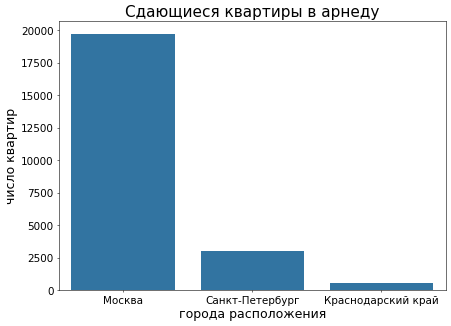

In [56]:
plot_it(data_by_towns, 'Адрес', 'count', 'Сдающиеся квартиры в арнеду', 
        'города расположения', 'число квартир')

## 4. Детальная структура массива

In [57]:
find_categories(data)

                     Столбец     Тип Уникальных
0             ID  объявления              23368
1          Количество комнат  строка         24
2                        Тип  строка          1
3                      Метро  строка       5866
4                      Адрес  строка      12850
5                Площадь, м2  строка      11255
6                        Дом  строка       2565
7                   Парковка  строка          5
8                       Цена  строка       3922
9                   Телефоны  строка      13172
10                  Описание  строка      23078
11                    Ремонт  строка          4
12        Площадь комнат, м2  строка       3990
13                    Балкон  строка         18
14                      Окна  строка          3
15                   Санузел  строка         20
16  Можно с детьми/животными  строка          3
17             Дополнительно  строка        528
18               Название ЖК  строка       1798
19                Серия дома  строка    

- такие колонки как Ссылка на объявление, Описание, ID имеют слишком большую долю уникальных значений и их, вероятно, невозможно будет использовать.
- такие столбцы как Парковка, Ремонт, Окна, Можно с детьми/животными и прочие имеют достаточное количество уникальных значений чтобы быть полезными при анализе
- остальные колонки будут проанализированы на полезность в процессе

In [58]:
pd.DataFrame({'Число пропущенных' : data.isnull().sum(), 
              'Доля из записей, %' : round(data.isnull().sum()/data_length*100, ndigits=1)})

,Число пропущенных,"Доля из записей, %"
ID объявления,0,0.0
Количество комнат,1041,4.5
Тип,0,0.0
Метро,1315,5.6
Адрес,0,0.0
"Площадь, м2",0,0.0
Дом,0,0.0
Парковка,13417,57.4
Цена,0,0.0
Телефоны,0,0.0


- Число пропущенных значений впечатляет! 
- Посмотрим сколько останется записей, если удалить все строки с пропущенными занчениями.

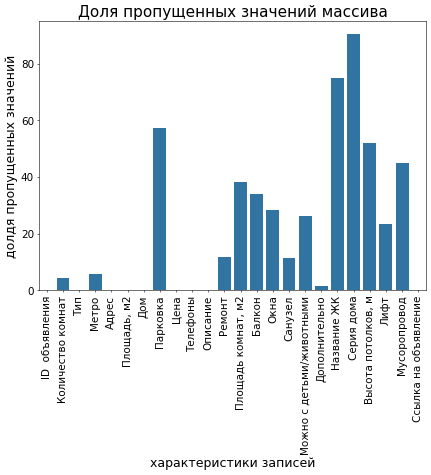

In [59]:
data_left = pd.DataFrame({'Параметр':data.columns.to_list(), 'Число пропущенных' : data.isnull().sum(), 
              'Доля из записей, %' : round(data.isnull().sum()/data_length*100, ndigits=1)})

plot_it(data_left, 'Параметр', 'Доля из записей, %', 'Доля пропущенных значений массива', 
        'характеристики записей', 'долдя пропущенных значений', x_vertical=True)

- доля пропущенных значений для Названия ЖК, Серии дома, Парковка слишком высока. Велика вероятность что в процессе анализа их невозможно будет использовать
- такие столбцы как Ремонт, Метро, количество комнат, Лифт и прочие на том же уровне - вполне практичны для анализа
- столбцы Ссылка на объявление, ID, Телефон, Описание - скорее всего использовать не получится

## 5. Подготовка массива к машинному обучению

- по каждому столбцу:
    - по возможности заменить пропущенные значения
    - проверить на дубликаты 
    - разбить строковые ячейки на составляющие для повышения описания сдающихся квартир, 
    создание дополнительных признаков
    - очистка и проверка на адекватность данных в столбцах
    - запись нового массива данных в файл